# Feature Engineering Notebook

This notebook takes the reconfigured files from the first notebook and explores the data.  We create new features and get the data in the proper format for analysis.  

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
import datatools

%matplotlib inline

In [2]:
#Bring in the data

nba = pd.read_csv('./data/nba_combined.csv')
#nba.dropna(inplace = True)

### Look at the Data

Let us look at the Distribution of the win margins that we will try and predict as well as how well the line does in separating the data.

We also want to look at the value of the points throughout the dataset. As line shopping can be an important factor in final win percentage. 

In [3]:
print('The standard deviation of the Win Margins is ',np.std(nba.home_win_margin))
print('The mean home winning margin is ', nba.home_win_margin.mean())

The standard deviation of the Win Margins is  13.187430525266322
The mean home winning margin is  3.0525970987365465


In [4]:
graph = datatools.DataGrapher()

Let Graph


In [5]:
graph.getdata(nba)

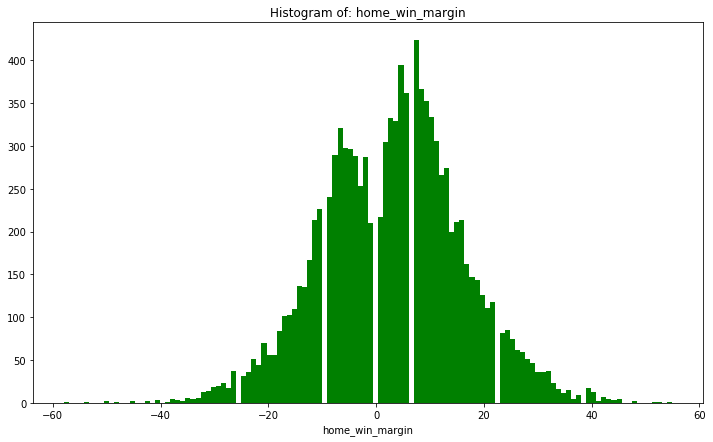

In [6]:
graph.plothist('home_win_margin', bins = 120)

In [7]:
nba.home_win_margin.value_counts(normalize= True)

 7.0     0.039588
 5.0     0.036874
 8.0     0.034254
 6.0     0.033879
 9.0     0.032943
 10.0    0.031259
 3.0     0.031165
 4.0     0.030791
-7.0     0.030042
 11.0    0.028638
 2.0     0.028545
-6.0     0.027890
-5.0     0.027702
-8.0     0.027047
-4.0     0.026954
-2.0     0.026860
 13.0    0.025643
 12.0    0.024895
-3.0     0.023678
-9.0     0.022461
-10.0    0.021151
 1.0     0.020309
-11.0    0.020028
 16.0    0.020028
 15.0    0.019747
-1.0     0.019654
 14.0    0.018718
-12.0    0.015629
 17.0    0.015161
 18.0    0.013758
           ...   
 36.0    0.001404
-31.0    0.001310
-32.0    0.001217
 40.0    0.001217
 35.0    0.001123
 38.0    0.000842
 42.0    0.000655
-33.0    0.000562
-35.0    0.000562
 45.0    0.000468
 43.0    0.000468
 37.0    0.000468
-34.0    0.000374
-38.0    0.000374
-37.0    0.000281
 44.0    0.000281
-41.0    0.000281
 41.0    0.000187
-36.0    0.000187
 48.0    0.000187
-42.0    0.000187
-45.0    0.000187
-50.0    0.000187
-48.0    0.000094
-39.0    0

Here we can see the importance of some numbers.  The most common outcome is the a home win of 7 that occurs 3.96% of the time.  Since we need 52.38% win rate getting a better line can in many cases overcome the percentage needed to win. Thus it can be critical to have multiple line options

In [8]:
print('The standard deviation of bookmaker errors ',np.std(nba.line_cv))
print('The mean of bookmaker errors', nba.line_cv.mean())

The standard deviation of bookmaker errors  11.759870381715213
The mean of bookmaker errors -0.28310248011230693


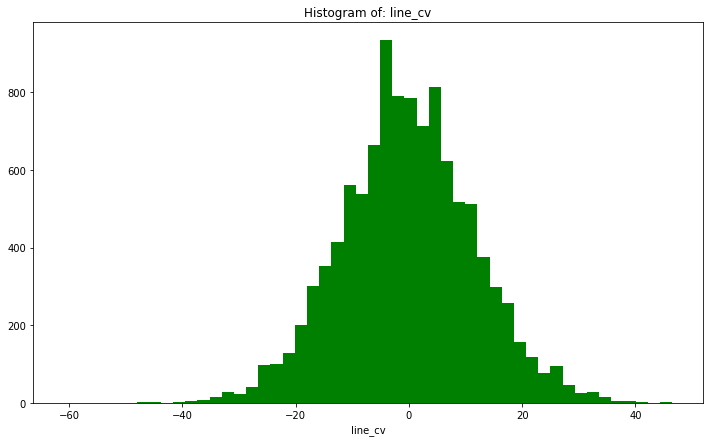

In [9]:
graph.plothist('line_cv')

The Error from the line is pretty normally distributed around zero.  With a mean of .2 and standard deviation of 11.  The standard deviation is high but that is to be expected.  Anyone that has ever watch an NBA game knows that there is large variance at the end of games with teams fouling and shooting with irregularity based on no real reason other than that games characteristics

In [10]:
print('The standard deviation of home_win_margin ',np.std(nba.home_win_margin))
print('The mean of home_win_margin', nba.home_win_margin.mean())

The standard deviation of home_win_margin  13.187430525266322
The mean of home_win_margin 3.0525970987365465


In [11]:
nba.cover.value_counts()

0    5604
1    5081
Name: cover, dtype: int64

In [12]:
nba.cover.value_counts(normalize = True)

0    0.524474
1    0.475526
Name: cover, dtype: float64

When we look at the away covers we can see the number of pushes is just under 2%. Currently pushes are considered losses but the values need to be recalibrated to 0 since a push is equivalent to a no bet.

The actual ratio of away to home covers would be 

         .4763 / .4763 + 5037 = 48.6% 


In [13]:
nba.away_cover.value_counts(normalize = True)

1    0.504633
0    0.495367
Name: away_cover, dtype: float64

Historically the away team has covered 52.36% of the time.  This would suggest that it might be easiest to identify away teams to beat the 52.38 percent mark.

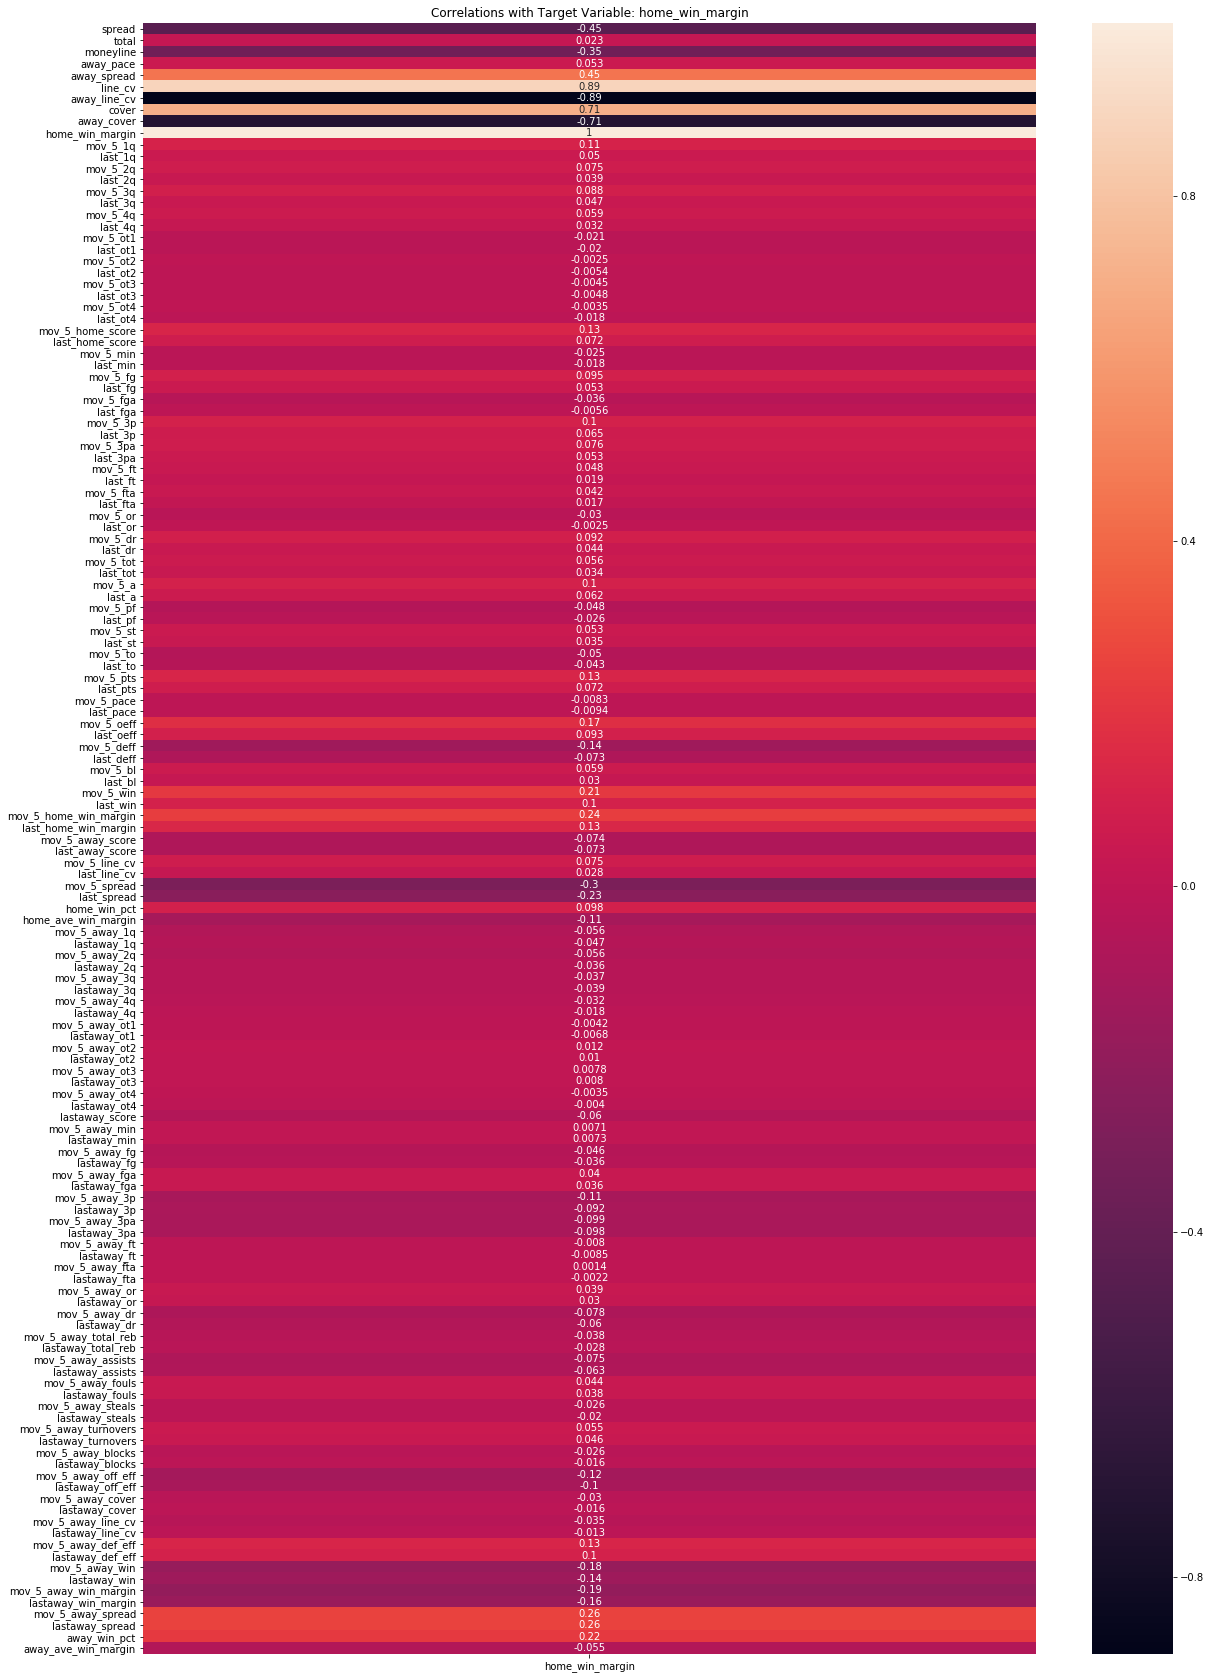

In [14]:
graph.plotheatc('home_win_margin')

#### Spread 

One would expect the spread to be a predictor of home win margin as it is the line the books put out to divide the action.  The spread should move with the actual win margin.

In [15]:
nba.groupby('spread').cover.mean()

spread
-22.50    1.000000
-21.50    1.000000
-21.00    0.000000
-20.50    1.000000
-20.00    0.000000
-19.50    0.500000
-19.00    0.666667
-18.00    0.142857
-17.50    0.500000
-17.00    0.444444
-16.50    0.333333
-16.00    0.500000
-15.50    0.400000
-15.00    0.622222
-14.50    0.562500
-14.00    0.268657
-13.50    0.459770
-13.00    0.415842
-12.50    0.446429
-12.00    0.447368
-11.50    0.405229
-11.00    0.491525
-10.50    0.524096
-10.45    1.000000
-10.00    0.458182
-9.50     0.497908
-9.00     0.479592
-8.50     0.516892
-8.00     0.441077
-7.50     0.519757
            ...   
 1.50     0.504386
 2.00     0.443439
 2.50     0.502415
 3.00     0.461847
 3.50     0.502283
 4.00     0.497717
 4.50     0.430769
 5.00     0.413265
 5.50     0.462366
 6.00     0.398734
 6.50     0.432432
 7.00     0.427350
 7.50     0.514563
 8.00     0.467532
 8.50     0.544118
 9.00     0.301587
 9.50     0.393939
 10.00    0.354839
 10.50    0.450000
 11.00    0.736842
 11.50    0.400000
 12.0

In [16]:
nba.spread.value_counts()

-5.00     399
-3.00     382
-6.00     378
-4.00     375
-7.00     373
-4.50     371
-3.50     365
-5.50     353
-6.50     346
-7.50     329
-2.00     326
-1.00     323
-2.50     298
-8.00     297
-8.50     296
-9.00     294
-10.00    275
 1.00     263
 3.00     249
-1.50     245
-9.50     239
 1.50     228
 2.00     221
 4.00     219
 3.50     219
 2.50     207
 5.00     196
 4.50     195
 5.50     186
-11.00    177
         ... 
-15.00     45
-15.50     35
 9.50      33
 10.00     31
-16.00     28
 10.50     20
 11.00     19
-16.50     18
 11.50     10
-17.00      9
 13.00      9
 12.00      8
-17.50      8
-0.50       7
-18.00      7
 14.00      4
 12.50      4
 14.50      4
 16.00      3
-19.00      3
-19.50      2
 15.00      2
 13.50      2
-20.00      1
-20.50      1
-21.00      1
-10.45      1
-22.50      1
-21.50      1
 16.50      1
Name: spread, Length: 76, dtype: int64

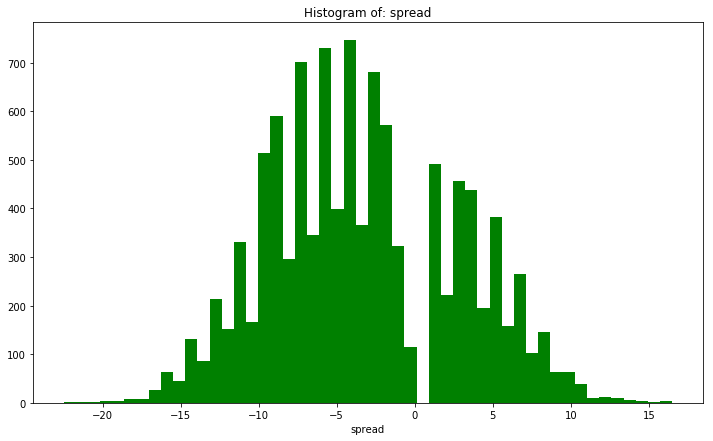

In [17]:
graph.plothist('spread')

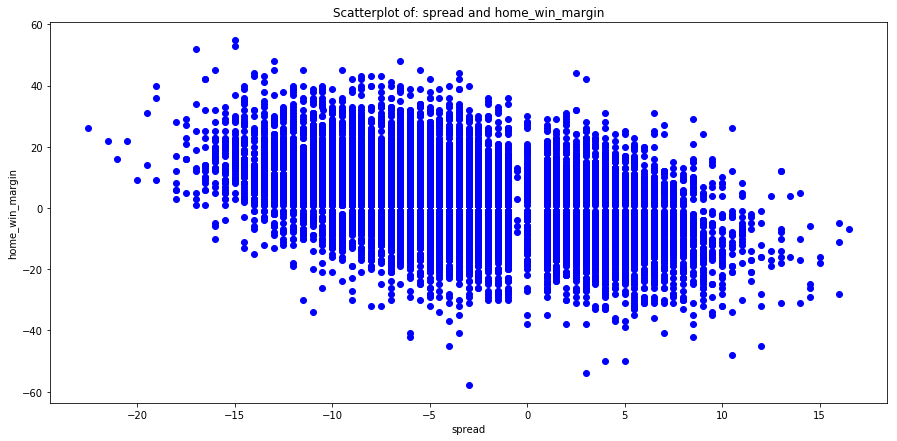

In [18]:
graph.plotscat('spread', 'home_win_margin')

In [19]:
nba.home_win_margin.corr(nba.spread)
#strong negative correlation as expected since line is opposite of win
#margin

-0.4525616530508494

In [20]:
nba['high_alt'] = nba.teams.map(lambda x: 1 if (x == "Denver") or 
                                (x== "Utah") else 0)

### Changing Rest Features to Dummies

The NBA schedule is not fixed and many teams have a different amount or rest entering games.  Last season they changed some rules and started the season earlier to make the season less taxing, but it is still important to account for the various

We will create a variable for each.  This will greatly expand our number of features as will future dummying that is, but the plan is to do feature extraction using Principal Components analysis so the feature increase should not be too onerous on the model.


In [21]:
nba = pd.get_dummies(nba , columns= ['away_rest', 'rest_days'], drop_first= True)

### Teams Dummies

It is also important to distinguish between teams teams venues and support might influence the outcomes of games.  Here we dummy teams accomplish that goal.



In [22]:
nba = nba = pd.get_dummies(nba, columns = ['teams', 'away_team'], drop_first = True)

### Referee Dummies 

The final dummy conversions are for the referee information.  Three referees generally work an NBA game.  We have the values for each and will convert them to dummies to incorporate any referee tendencies.

In [23]:
#nba = pd.get_dummies(nba, columns = ['ref_1','crew_referees','ref_3'], drop_first = True)

### Cumulative Stats Variables

There are for cumulative stats variable we generated Average win margin and Average win percentage for both home and away variables

In [24]:
#nba.dropna(inplace = True)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/bryancombs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

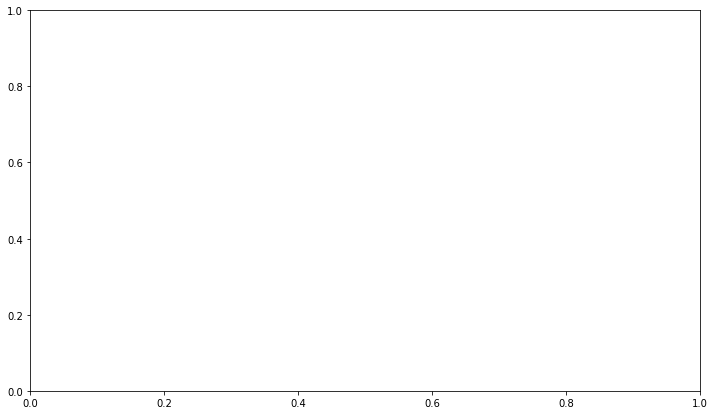

In [26]:
graph.plothist('home_ave_win_margin')

In [27]:
nba.home_ave_win_margin.value_counts()

 1.500000     39
 0.000000     36
 0.500000     35
 1.000000     34
 2.000000     30
-0.500000     29
-2.000000     27
-1.500000     27
-3.000000     23
 1.250000     22
-1.000000     21
 0.750000     21
-2.500000     20
-0.750000     19
 2.250000     19
 2.500000     19
 0.833333     18
 3.000000     18
-0.250000     16
 0.333333     16
 1.750000     16
 2.333333     15
 0.166667     14
 1.333333     14
 0.250000     14
-0.400000     14
-0.166667     14
 1.375000     14
 2.750000     14
-4.000000     13
              ..
 0.089286      1
 2.387500      1
-0.682927      1
-3.616667      1
 3.888889      1
-0.180556      1
-4.863636      1
 1.612903      1
 10.375000     1
-2.977778      1
 5.282609      1
-0.025000      1
-8.125000      1
-2.343750      1
 3.406250      1
 3.978261      1
-5.562500      1
-1.902778      1
 0.217391      1
 3.151515      1
 4.312500      1
-2.968750      1
 1.172414      1
 0.986842      1
-1.240000      1
-3.518519      1
-1.661290      1
 5.425926     

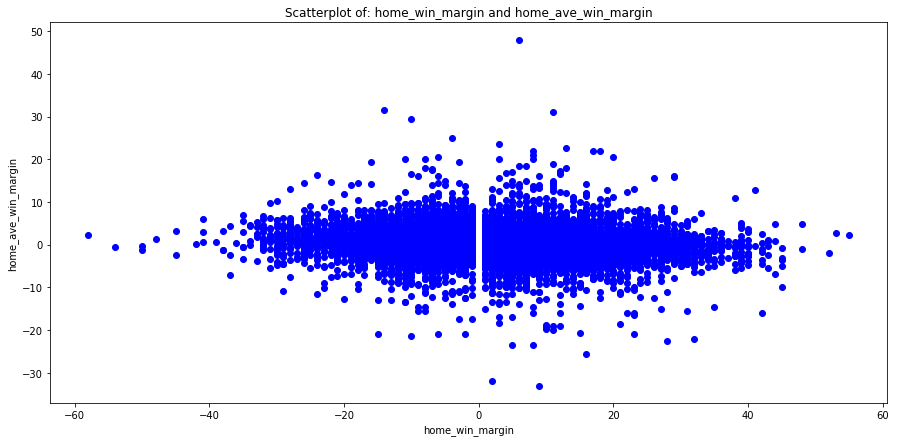

In [28]:
graph.plotscat('home_win_margin', 'home_ave_win_margin')

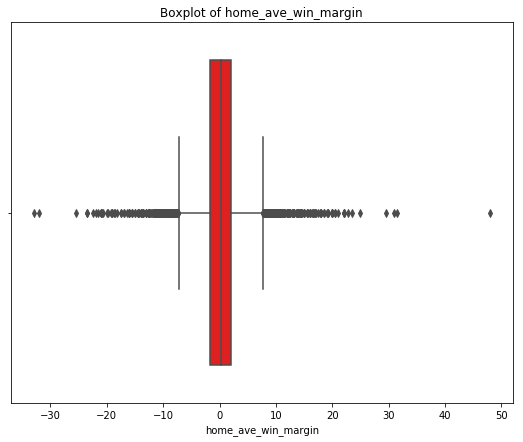

In [29]:
graph.plotbox('home_ave_win_margin')

In [30]:
nba.home_win_margin.corr(nba.home_ave_win_margin)
#strong positive correlation

-0.14489800977593723

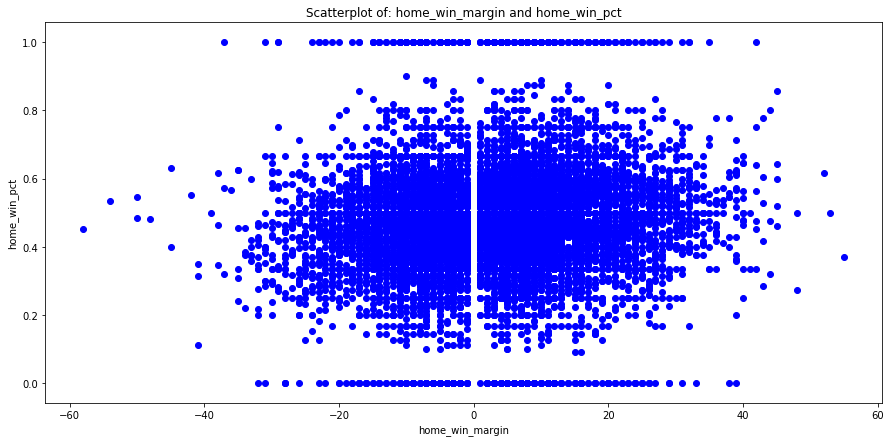

In [31]:
graph.plotscat('home_win_margin', 'home_win_pct')

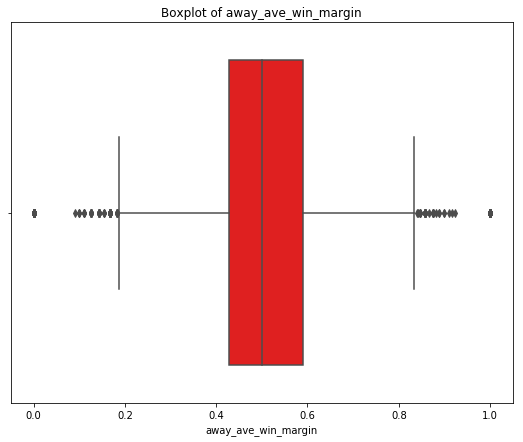

In [32]:
graph.plotbox('away_ave_win_margin')

In [33]:
nba.home_win_margin.corr(nba.home_win_pct)
#strong positive correlation

0.13613958644561944

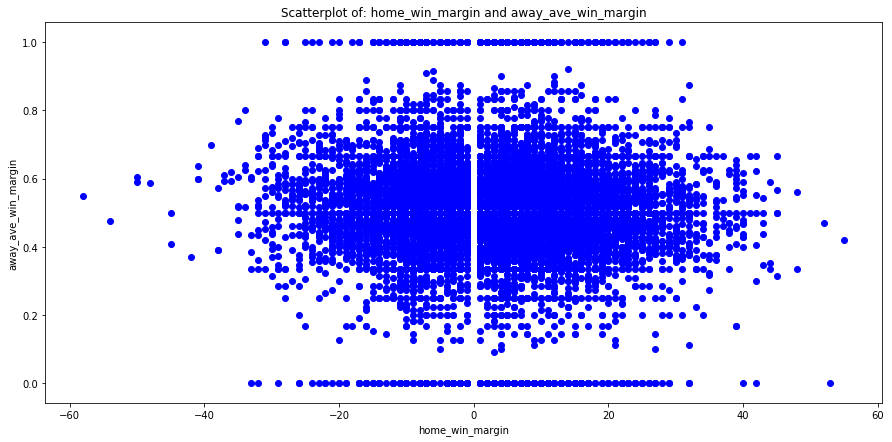

In [34]:
graph.plotscat('home_win_margin', 'away_ave_win_margin')

In [35]:
nba.home_win_margin.corr(nba.away_ave_win_margin)


-0.07091364740819074

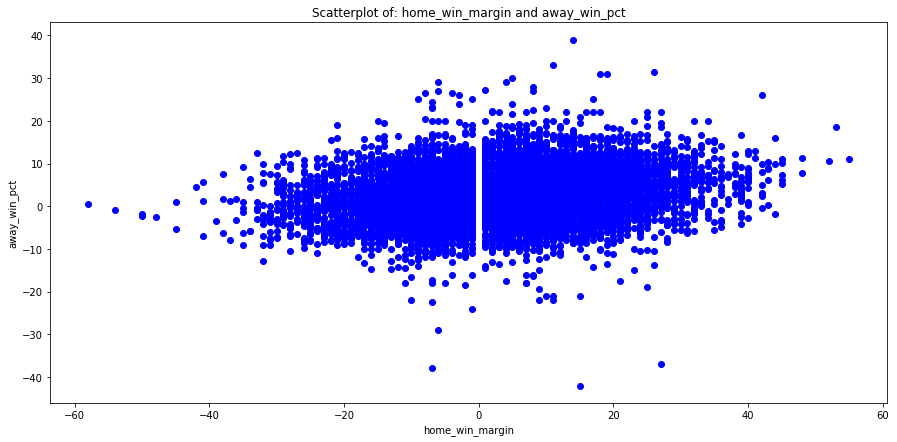

In [36]:
graph.plotscat('home_win_margin', 'away_win_pct')

In [37]:
nba.home_win_margin.corr(nba.away_win_pct)


0.24845497288540022

### Relative Offensive and Defensive efficiencies

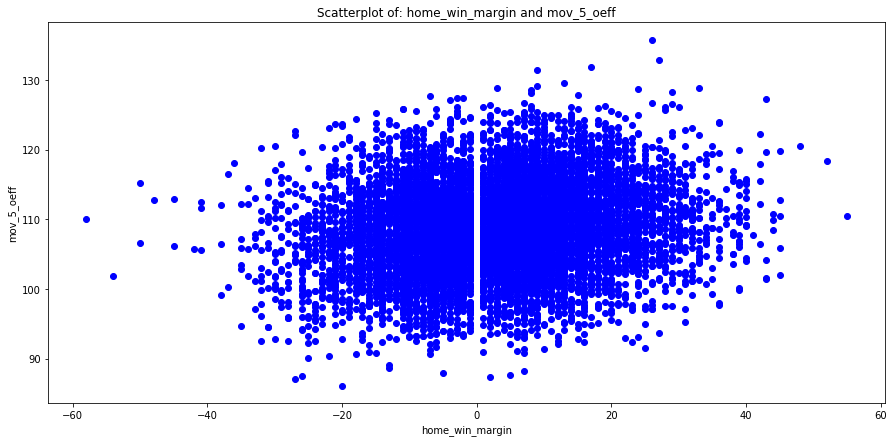

In [38]:

graph.plotscat('home_win_margin', 'mov_5_oeff')



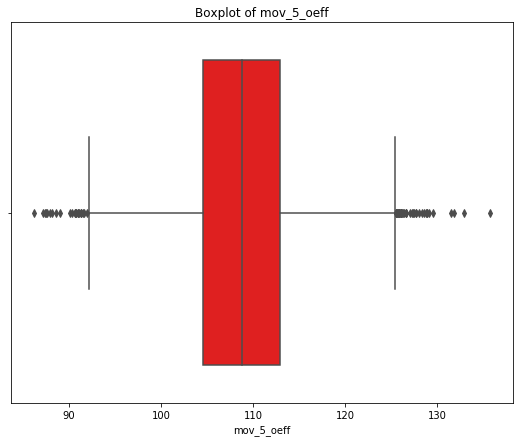

In [39]:
graph.plotbox('mov_5_oeff')

In [40]:
nba.mov_5_oeff = np.log(nba.mov_5_oeff)

In [41]:
nba.mov_5_oeff.value_counts()

4.683427    22
4.662306    21
4.694462    19
4.719034    18
4.667206    18
4.701752    18
4.689695    18
4.676746    17
4.711330    17
4.721886    17
4.689327    17
4.685274    16
4.690614    16
4.702841    16
4.714742    16
4.705197    16
4.699753    16
4.694096    16
4.718856    16
4.662684    16
4.682872    15
4.730569    15
4.647463    15
4.702297    15
4.692082    15
4.659090    14
4.714383    14
4.713127    14
4.660794    14
4.704835    14
            ..
4.649378     1
4.551347     1
4.839451     1
4.699753     1
4.813484     1
4.742669     1
4.576976     1
4.814620     1
4.701207     1
4.763199     1
4.764223     1
4.606369     1
4.780467     1
4.776431     1
4.572234     1
4.689695     1
4.757548     1
4.776262     1
4.708990     1
4.598951     1
4.626149     1
4.563723     1
4.716712     1
4.637444     1
4.582720     1
4.585172     1
4.556610     1
4.790321     1
4.812672     1
4.589244     1
Name: mov_5_oeff, Length: 2330, dtype: int64

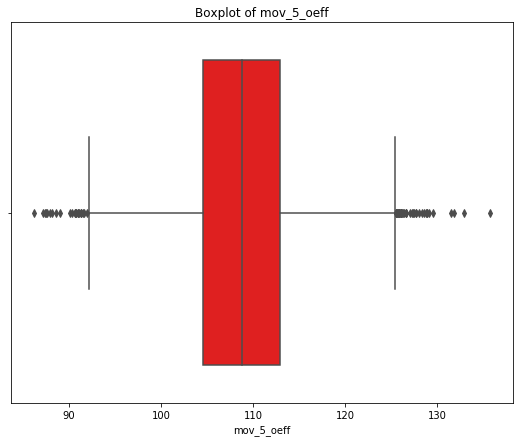

In [42]:
graph.plotbox('mov_5_oeff')

In [43]:
nba.home_win_margin.corr(nba.mov_5_oeff)

0.17098215477528522

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Offensive Efficeincy Numbers')

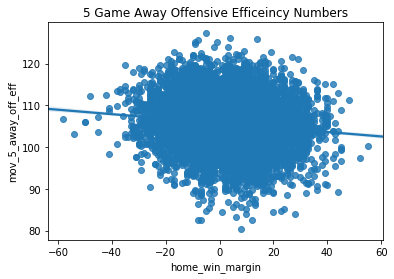

In [44]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_off_eff)
plt.title("5 Game Away Offensive Efficeincy Numbers")

In [45]:
nba.home_win_margin.corr(nba.mov_5_away_off_eff)

-0.12049705554193314

In [46]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_3_oeff)
plt.title("3 Game Home Offensive Efficeincy Numbers")

AttributeError: 'DataFrame' object has no attribute 'mov_3_oeff'

In [47]:
nba.home_win_margin.corr(nba.mov_3_oeff)

AttributeError: 'DataFrame' object has no attribute 'mov_3_oeff'

In [48]:
#eff ratio ratio by line for 3 and 5 game moving averages
nba['eff_ratio1'] = ((nba.mov_5_deff )/(nba.mov_5_away_def_eff ))  
nba['eff_ratio2'] = (nba.mov_5_oeff/ nba.mov_5_away_off_eff) 
nba['eff_ratio3'] = ((nba.mov_3_deff )/(nba.mov_3_away_def_eff ))  
nba['eff_ratio4'] = (nba.mov_3_oeff/ nba.mov_3_away_off_eff)  

AttributeError: 'DataFrame' object has no attribute 'mov_3_deff'

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Offensive efficiency ratio')

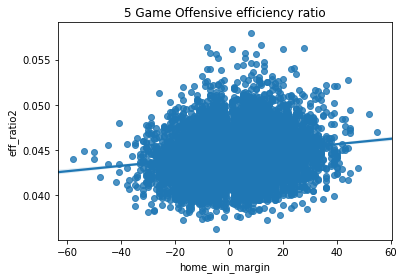

In [49]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.eff_ratio2)
plt.title("5 Game Offensive efficiency ratio")

In [50]:
nba.home_win_margin.corr(nba.eff_ratio1)

-0.19567207513997126

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Win Margin Moving Average')

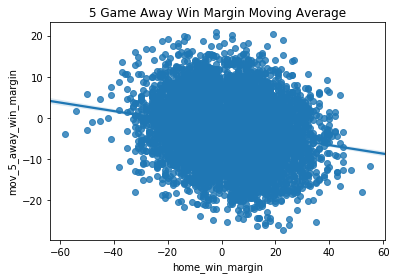

In [51]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_win_margin)
plt.title("5 Game Away Win Margin Moving Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Win Margin Moving Average')

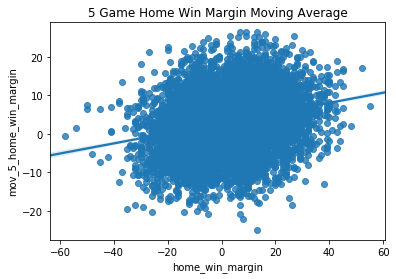

In [52]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_home_win_margin)
plt.title("5 Game Home Win Margin Moving Average")

In [53]:
nba['win_margin_ratio'] = (nba.mov_5_home_win_margin)/(nba.mov_5_away_win_margin)

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Win Margin Moving Average')

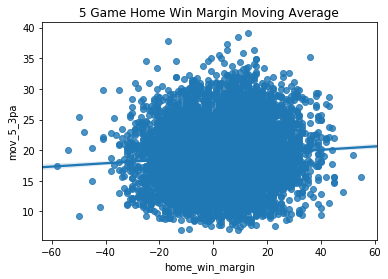

In [54]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_3pa)
plt.title("5 Game Home Win Margin Moving Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away 3 Point Attempts')

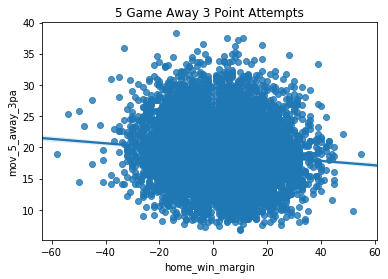

In [55]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_3pa)
plt.title("5 Game Away 3 Point Attempts")

In [56]:
nba['home_score_margin'] = nba.mov_5_home_score*nba.home_ave_win_margin
nba['away_score_margin'] = nba.mov_5_away_score*nba.away_ave_win_margin

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Score * Cumulative Win Margin')

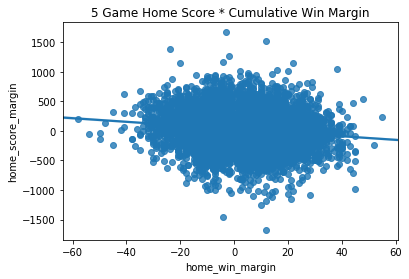

In [57]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Home Score * Cumulative Win Margin")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Score * Cumulative Away Win Margin')

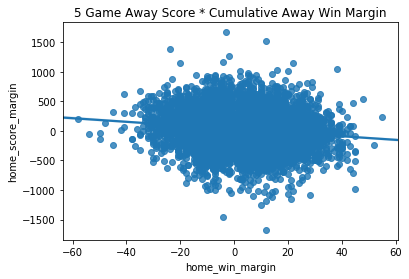

In [58]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.home_score_margin)
plt.title("5 Game Away Score * Cumulative Away Win Margin")

###  Traveling to High Altitude Locations

Traveling to high altitude locations can be tiring for players not used to altitude.  Check to see if these location make a difference.

#### Assists

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Assist Average')

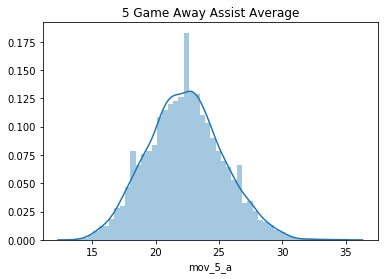

In [59]:
plt.gcf()
sns.distplot(nba.mov_5_a)
plt.title("5 Game Away Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

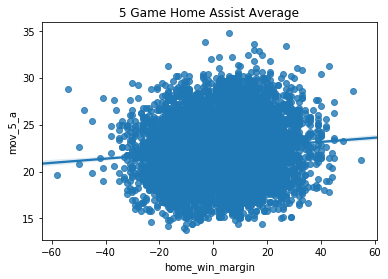

In [60]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_a)
plt.title("5 Game Home Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Away Assist Average')

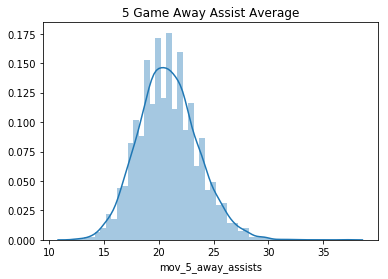

In [61]:
plt.gcf()
sns.distplot(nba.mov_5_away_assists)
plt.title("5 Game Away Assist Average")

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

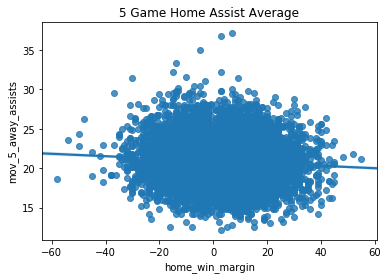

In [62]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.mov_5_away_assists)
plt.title("5 Game Home Assist Average")

In [63]:
assist_ratio = nba.mov_5_a/nba.mov_5_away_assists

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'5 Game Home Assist Average')

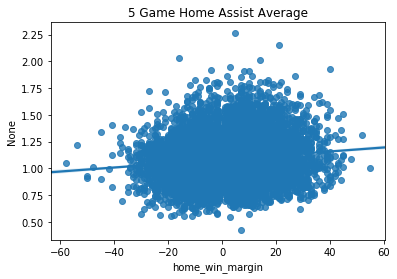

In [64]:
plt.gcf()
sns.regplot(nba.home_win_margin, assist_ratio)
plt.title("5 Game Home Assist Average")

#### Three Point Attempts

### Travel from West Coast/ East Coast

It is hypothesized that Traveling from West Coast to East Coast is more difficult as losing time makes it tougher to acclimate.  Check to see if this is a factor

In [65]:

### Travel Distance

In [66]:
nba.dataset.value_counts()

2007-2008 Regular Season    1061
2006-2007 Regular Season    1058
2008-2009 Regular Season     983
2009-2010 Regular Season     982
2010-2011 Regular Season     980
2014-2015 Regular Season     914
2013-2014 Regular Season     914
2012-2013 Regular Season     903
2011-2012 Regular Season     758
2009 Playoffs                 85
2008 Playoffs                 83
2007 Playoffs                 78
2010 Playoffs                 76
2015 Playoffs                 75
2013 Playoffs                 67
2011 Playoffs                 63
2012 Playoffs                 61
2014 Playoffs                 58
Name: dataset, dtype: int64

### Playoff Games

Currently, the data sets contain both regular season and playoff games.  Here I create a feature dummy variable that indicates the game is a playoff game.

In [67]:
nba['playoff_game'] = nba.dataset.map(lambda x:1 if x[5] =='P' else 0)

In [68]:
nba.playoff_game.value_counts()

0    8553
1     646
Name: playoff_game, dtype: int64

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'playoff games')

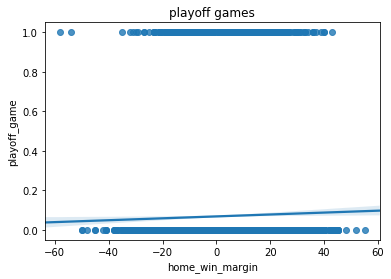

In [69]:
plt.gcf()
sns.regplot(nba.home_win_margin, nba.playoff_game)
plt.title("playoff games")

### Problem with Traditional Metrics

Our first models concentrated on traditional metrics such as scoring and effeciency numbers did not have any explanatory power in predicting the spread.  Some of this is due to the fact that the spread is created using these numbers so they do not predict better than the spread.  So while we will keep some of these variable in the model.  We are going to try and look for combinations that might explain subsets of results that would not be incorporated in the full model.  

#### Small Away team dogs coming off a outright win






In [70]:
nba['feature_1'] = 0
nba['feature_1'][(nba.lastaway_win == 1) &
                 (nba.spread < -3) & 
                 (nba.spread > -10)] = 1
                 

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
nba[nba.feature_1 == 1].cover.mean()


0.5608695652173913

### Winning Away Teams coming off a loss and are small favs

In [72]:
nba['feature_1'] = 0
nba['feature_1'][(nba.lastaway_win == 1) &
                 (nba.spread < -3) & 
                 (nba.spread > -10)] = 1

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [73]:
nba.feature_1.value_counts()

0    8969
1     230
Name: feature_1, dtype: int64

In [74]:
nba[nba.feature_1 == 1].cover.mean()

0.5608695652173913

In [75]:
nba['feature_2'] = 0
nba['feature_2'][(nba.lastaway_win == 0) &
                 (nba.spread > 0) & 
                 (nba.spread < 10)] = 1

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [76]:
nba['feature_3'] = 0
nba['feature_3'][(nba.last_win == 0) &
                 (nba.spread > 4) & 
                 (nba.spread < 10)] = 1

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [77]:
nba[nba.feature_3 == 1].away_cover.mean()

0.5622435020519836

In [78]:
nba['feature_4'] = 0
nba['feature_4'][(nba.mov_5_win < .4) &
                 (nba.spread < 7.5) & 
                 (nba.spread > 0)] = 1
nba[nba.feature_4 == 1].away_cover.mean()

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.5374592833876222

In [79]:
nba['feature_5'] = 0
nba['feature_5'][(nba.mov_5_away_win < .6) &
                 (nba.spread < 20) & 
                 (nba.spread > 0)] = 1
nba[nba.feature_5 == 1].away_cover.mean()

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.547104580812446

In [80]:
nba['feature_6'] = 0
nba['feature_6'][(nba.mov_5_away_off_eff > nba.mov_5_oeff) &
                 (nba.spread < 20) & 
                 (nba.spread > 3)] = 1
nba[nba.feature_6 == 1].away_cover.mean()

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.5336911150864639

In [81]:
nba.feature_6.value_counts()

0    7522
1    1677
Name: feature_6, dtype: int64

In [82]:
nba['feature_7'] = 0
nba['feature_7'][(nba.mov_5_away_def_eff > nba.mov_5_deff) &
                 (nba.spread < 20) & 
                 (nba.spread > 3)] = 1
nba[nba.feature_7 == 1].away_cover.mean()

/Users/bryancombs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.5579710144927537

In [83]:
nba.feature_7.value_counts()

0    8509
1     690
Name: feature_7, dtype: int64

In [84]:
nba.to_csv('./data/nba_analysis_data.csv', index = False)

In [235]:
nba.columns[200:]

Index(['teams_Seattle', 'teams_Toronto', 'teams_Utah', 'teams_Washington',
       'away_team_Boston', 'away_team_Charlotte', 'away_team_Chicago',
       'away_team_Cleveland', 'away_team_Dallas', 'away_team_Denver',
       'away_team_Detroit', 'away_team_Golden_State', 'away_team_Houston',
       'away_team_Indiana', 'away_team_LA_Clippers', 'away_team_LA_Lakers',
       'away_team_Memphis', 'away_team_Miami', 'away_team_Milwaukee',
       'away_team_Minnesota', 'away_team_New_Jersey', 'away_team_New_Orleans',
       'away_team_New_York', 'away_team_Orlando', 'away_team_Philadelphia',
       'away_team_Phoenix', 'away_team_Portland', 'away_team_Sacramento',
       'away_team_San_Antonio', 'away_team_Seattle', 'away_team_Toronto',
       'away_team_Utah', 'away_team_Washington', 'feature_1', 'feature_2'],
      dtype='object')